# Assignment - I
___
### Classification of Biomechanical Data using Decision Trees

                                                                                                Yogesh Naren Bundey


### Procedure:

Take Data2 and split it into randomly selected 210 training instances and remaining 100 as
test instance. Create decision trees using the training set and the “minimum records per leaf
node” values of 3, 8, 12, 30, and 50.

a)  Show the trees for all the five cases of min record values. Comment on what you see in a comparative analysis of the five trees. Just reporting the numbers is not enough; you must try to give an explanation of the changes observed. Which of these five trees would you prefer to use and why?

In [1]:
import os
import numpy as np
import pandas as pd
import graphviz as gv
import pydotplus as pdp
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

from IPython.display import Image

Data2 = '../Data/Biomechanical_Data_column_2C_weka.csv'
Data3 = '../Data/BiomechanicalData_column_3C_weka.csv'

In [2]:
acc_list, pr_list, rc_list, dot_data = [],[],[],[]
min_leaf = [3,8,12,30,50]

df = pd.read_csv(Data2)

X = df.drop('class',axis=1)
y = pd.get_dummies(df['class'].astype('category')).drop('Normal',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.32,random_state=42)

dot_data = StringIO()

for i in min_leaf:
    dtree = DecisionTreeClassifier(min_samples_leaf=i, random_state=42)
    dtree = dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)

    acc_list.append(dtree.score(X_test,y_test))
    pr_list.append(precision_score(y_test,y_pred))
    rc_list.append(recall_score(y_test,y_pred))
    tree.export_graphviz(dtree, out_file=dot_data, 
                         feature_names=X.columns.values,  
                         class_names=df['class'].unique(),  
                         filled=True, rounded=True,  
                         special_characters=True)
    graph = pdp.graph_from_dot_data(dot_data.getvalue())

Minimum Records per leaf nodes: 3


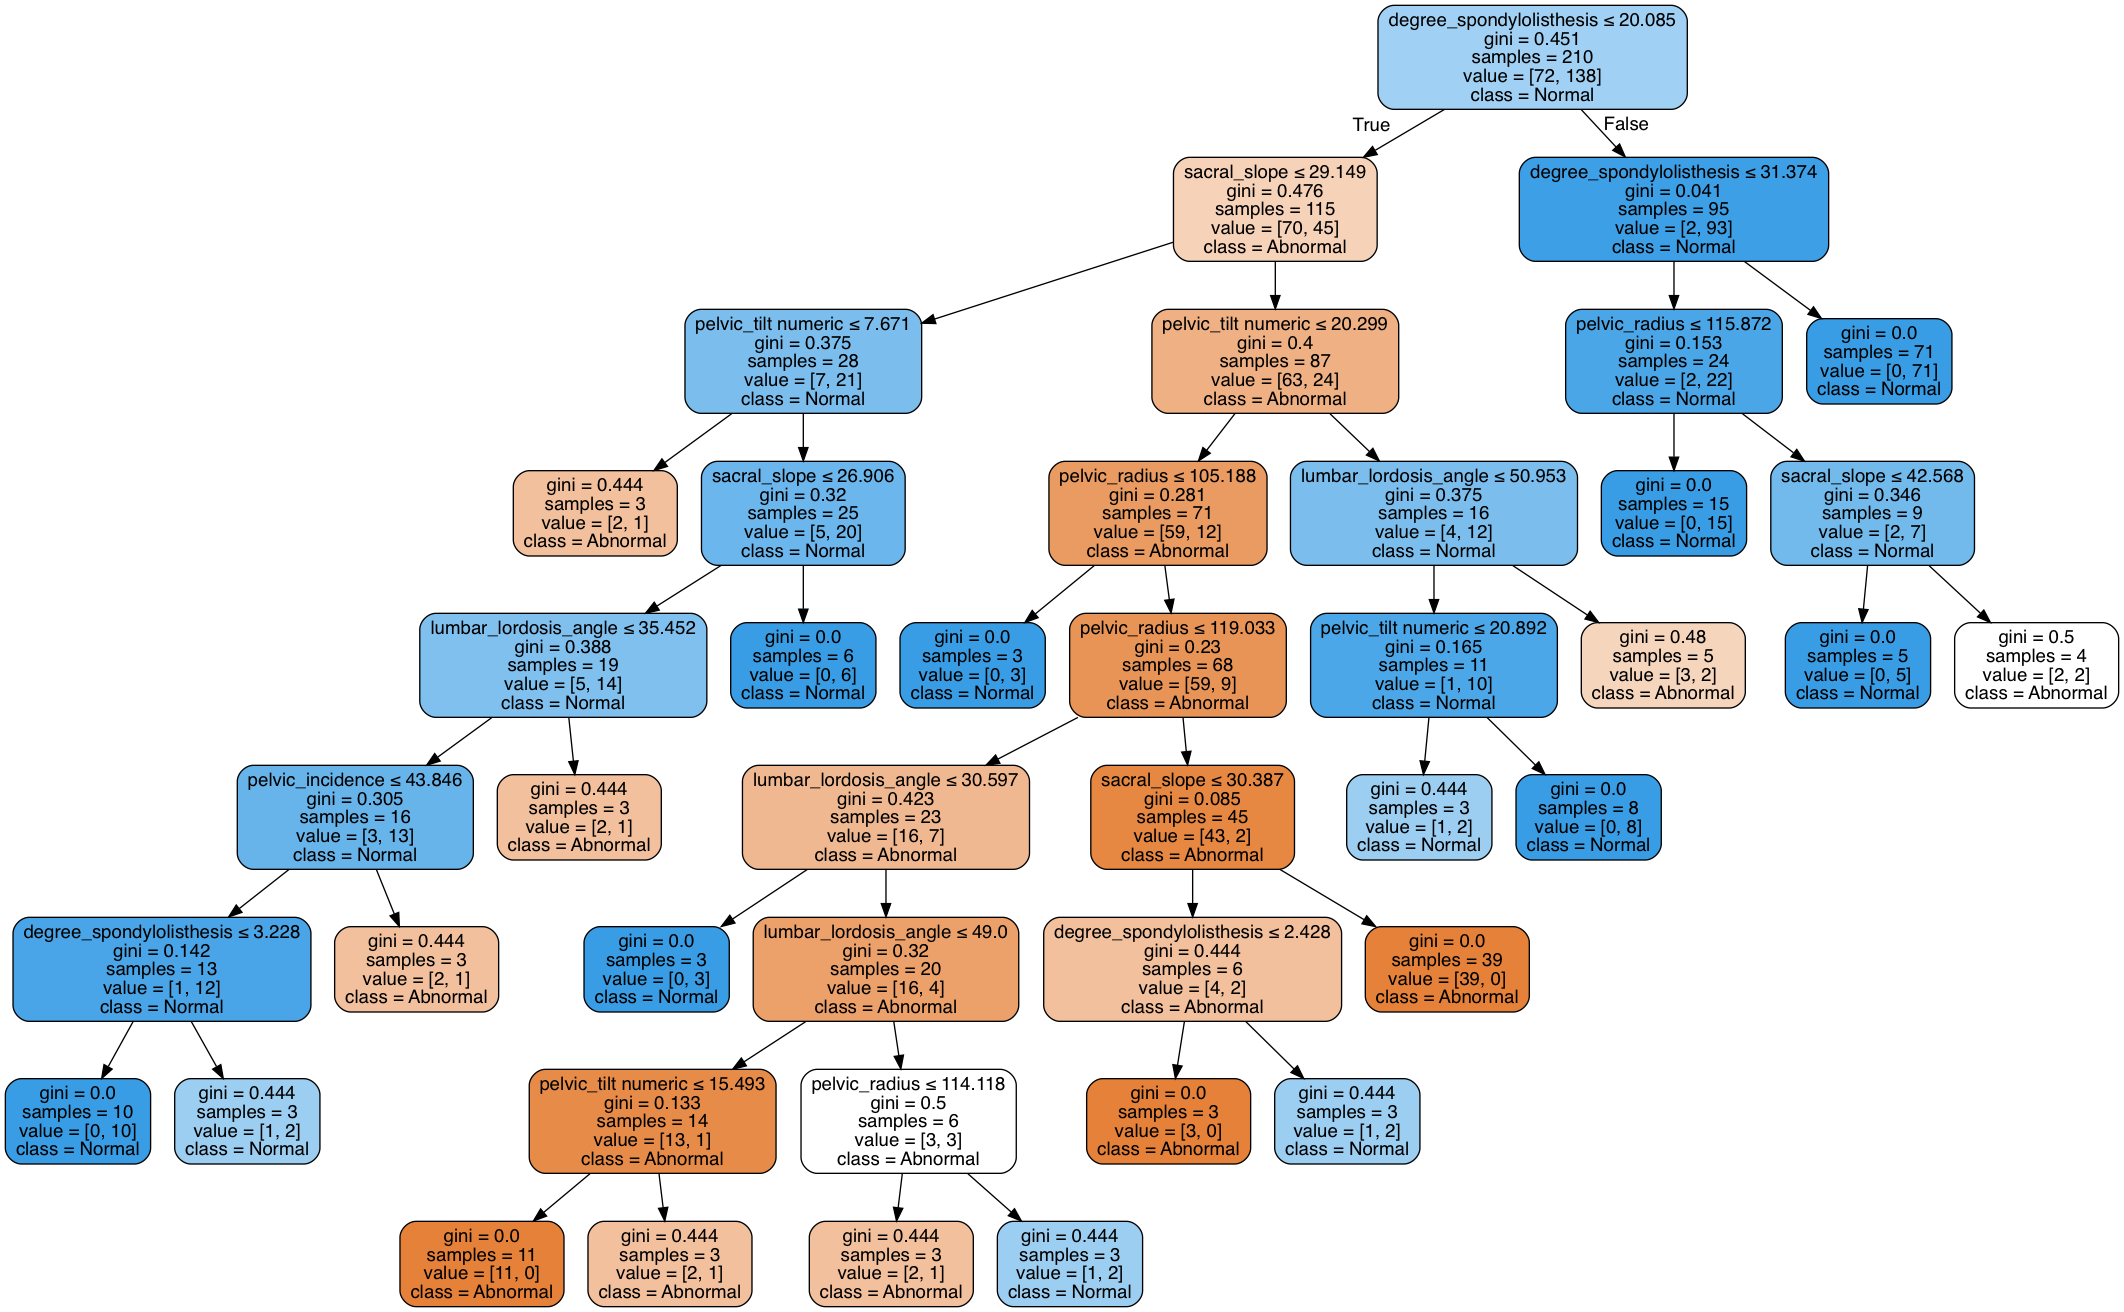

In [3]:
print("Minimum Records per leaf nodes: 3")
Image(graph[0].create_png())

Minimum Records per leaf nodes: 8


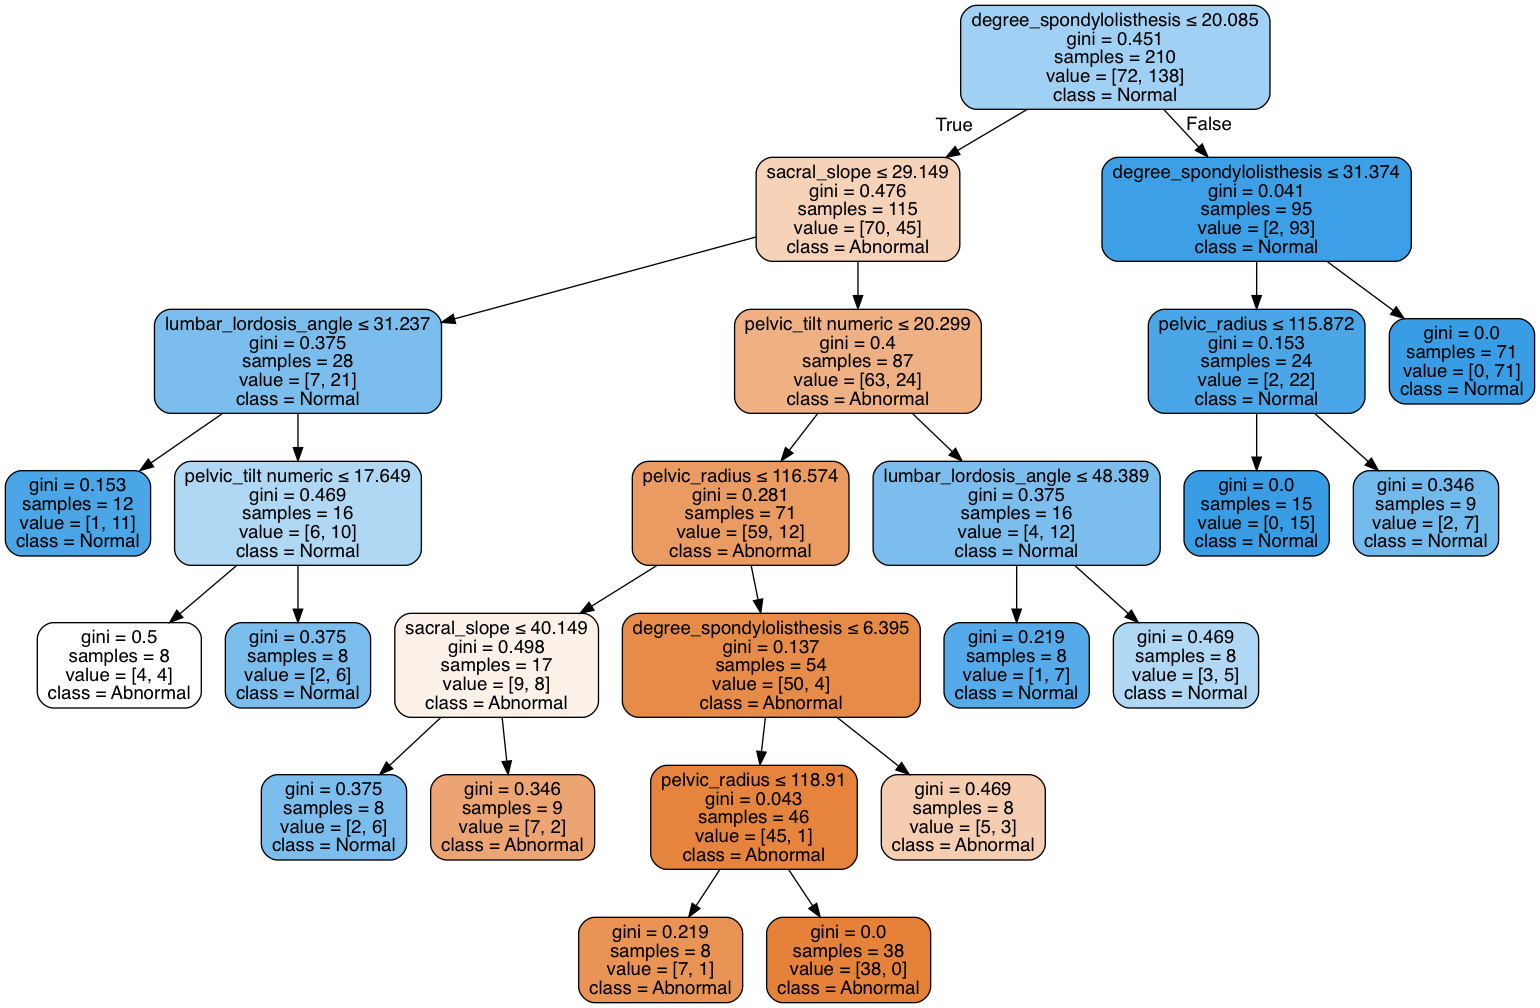

In [4]:
print("Minimum Records per leaf nodes: 8")
Image(graph[1].create_png())

Minimum Records per leaf nodes: 12


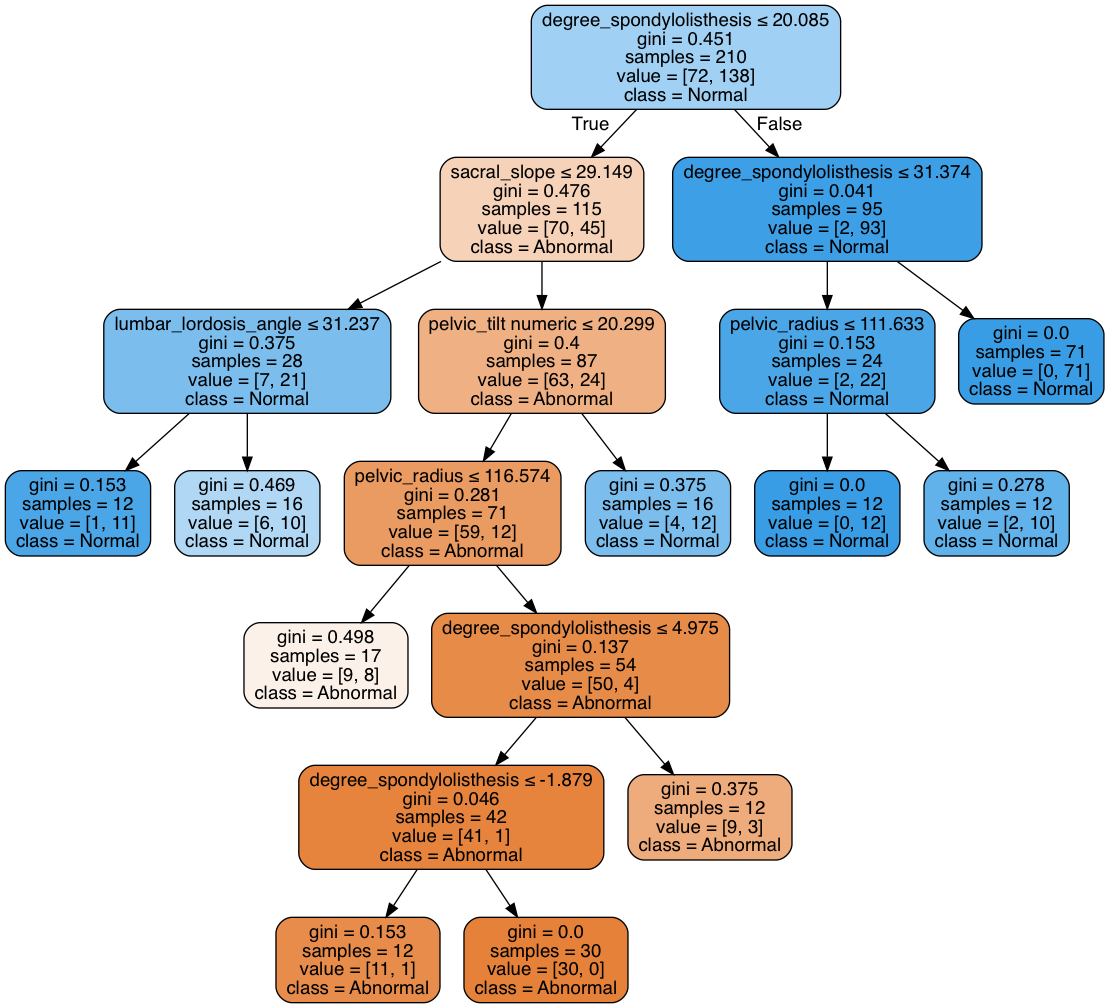

In [5]:
print("Minimum Records per leaf nodes: 12")
Image(graph[2].create_png())

Minimum Records per leaf nodes: 30


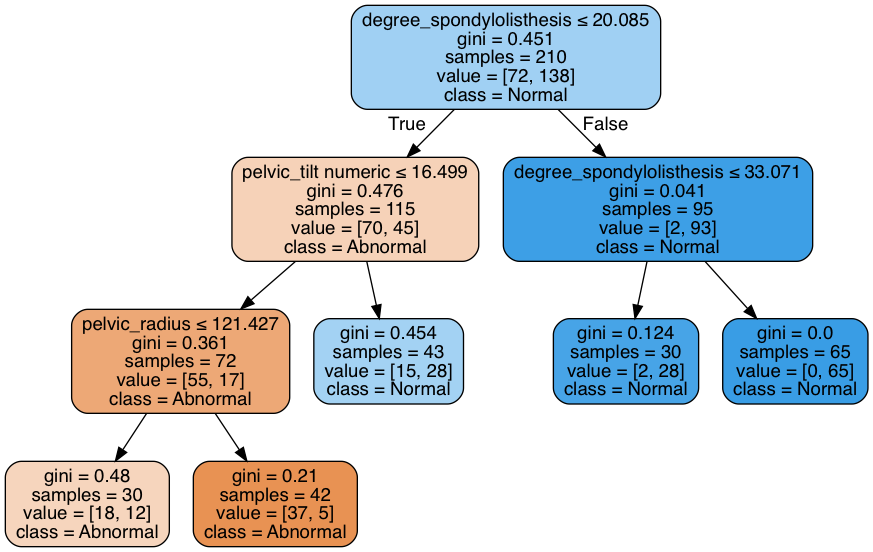

In [6]:
print("Minimum Records per leaf nodes: 30")
Image(graph[3].create_png())

Minimum Records per leaf nodes: 50


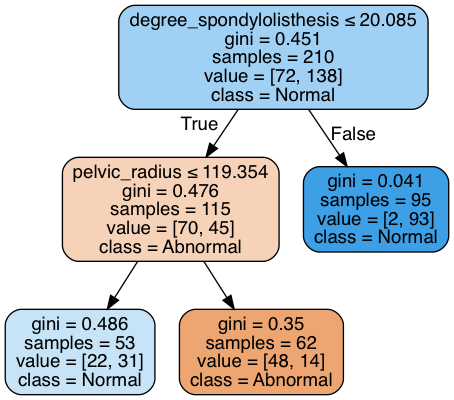

In [7]:
print("Minimum Records per leaf nodes: 50")
Image(graph[4].create_png())

In [8]:
Details1 = pd.DataFrame(np.column_stack([min_leaf, acc_list, pr_list, rc_list, graph]),
                       columns = ['Min_Records_Leaf','Accuracy_Score','Precision_Score','Recall_Score','Graph_Images'])
Details1

,Min_Records_Leaf,Accuracy_Score,Precision_Score,Recall_Score,Graph_Images
0,3,0.78,0.867647,0.819444,<pydotplus.graphviz.Dot object at 0x1093cce10>
1,8,0.82,0.875,0.875,<pydotplus.graphviz.Dot object at 0x108ff2c18>
2,12,0.76,0.833333,0.833333,<pydotplus.graphviz.Dot object at 0x108c6aa90>
3,30,0.72,0.805556,0.805556,<pydotplus.graphviz.Dot object at 0x108c6aac8>
4,50,0.83,0.887324,0.875,<pydotplus.graphviz.Dot object at 0x109380da0>


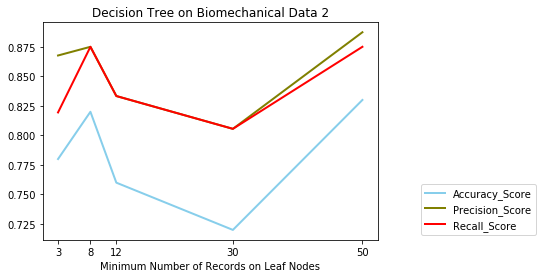

In [9]:
plt.plot(Details1['Min_Records_Leaf'], Details1['Accuracy_Score'], color='skyblue', linewidth = 2)
plt.plot(Details1['Min_Records_Leaf'], Details1['Precision_Score'], color='olive', linewidth = 2)
plt.plot(Details1['Min_Records_Leaf'], Details1['Recall_Score'], color='red', linewidth = 2)

plt.xlabel('Minimum Number of Records on Leaf Nodes')
plt.xticks(min_leaf)
plt.title('Decision Tree on Biomechanical Data 2')
plt.legend(loc='lower center', bbox_to_anchor=(0.8, 0., 1.0, 0.5))
plt.show()

In [10]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_depth : int or None, optional (default=None)
 |      The maximum depth of the tree. If None, then nodes are expanded until
 |      all leaves are pure or until all leaves contain less than
 |      min_samples_split samples.
 |  
 |  min_samples_split : int, float, optional (default=2)

In [11]:
df = pd.read_csv(Data3)

acc_list, pr_list, rc_list, dot_data = [],[],[],[]
min_leaf = [3,8,12,30,50]

X = df.drop('class',axis=1)
y = pd.get_dummies(df['class'].astype('category')).drop('Normal',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.32,random_state=42)
dot_data = StringIO()

for i in min_leaf:
    dtree = DecisionTreeClassifier(min_samples_leaf=i, random_state=42)
    dtree = dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)

    acc_list.append(dtree.score(X_test,y_test))
    pr_list.append(precision_score(y_test,y_pred,average='micro'))
    rc_list.append(recall_score(y_test,y_pred,average='micro'))
    tree.export_graphviz(dtree, out_file=dot_data, 
                         feature_names=X.columns.values,  
                         class_names=['Hernia','Spondylolisthesis','Normal'],  
                         filled=True, rounded=True,  
                         special_characters=True)
    graph = pdp.graph_from_dot_data(dot_data.getvalue())

Minimum Records per leaf nodes: 3


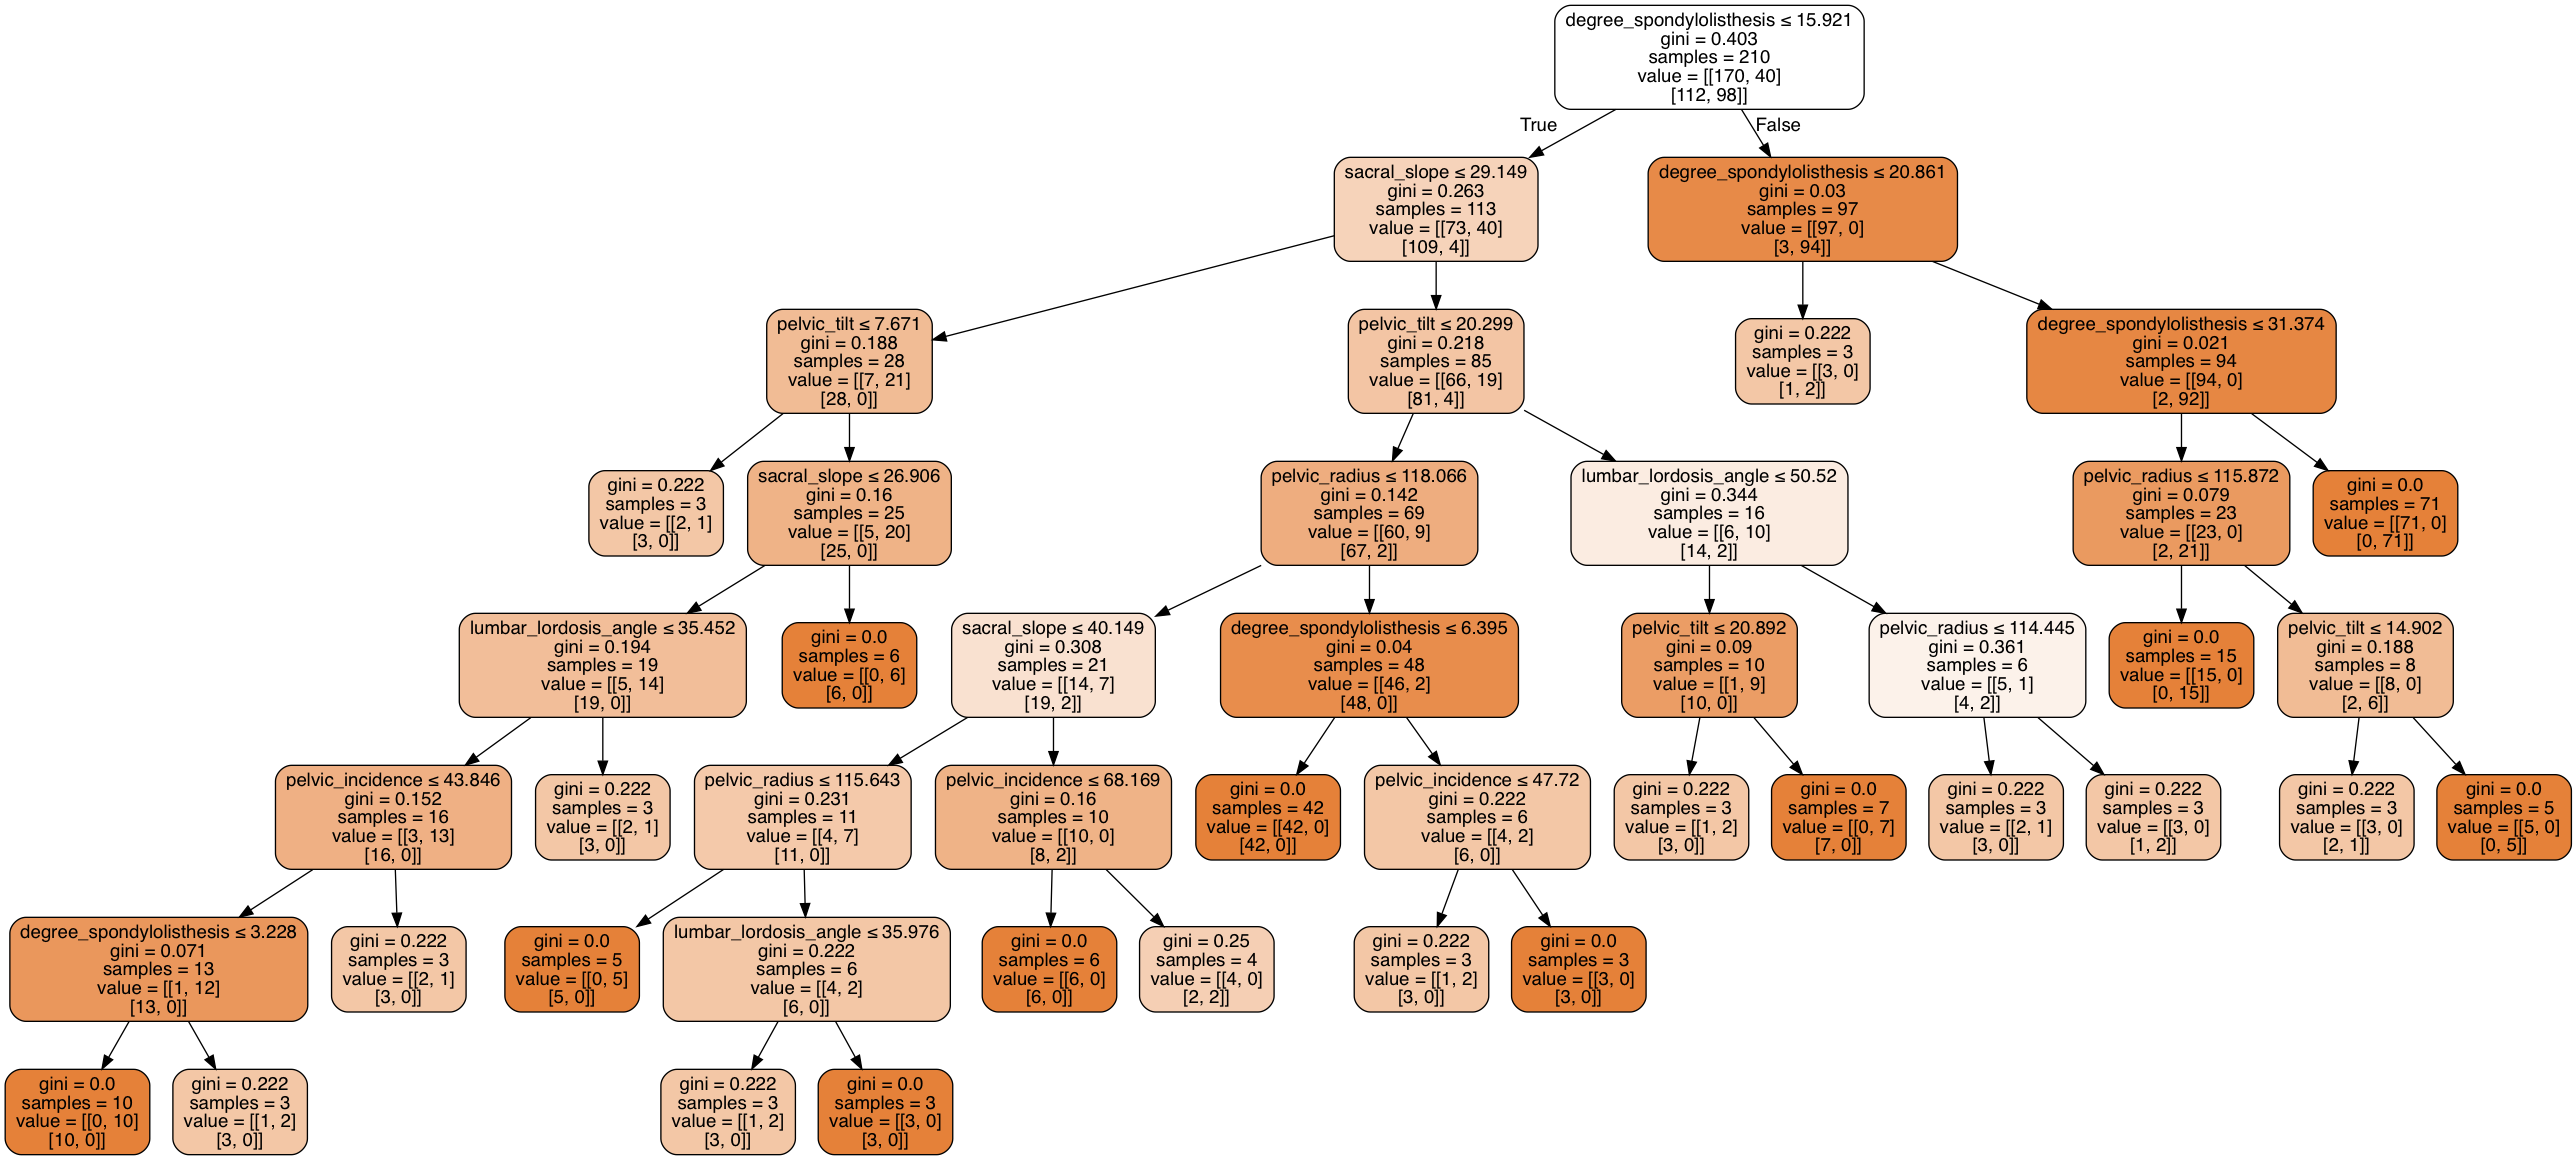

In [12]:
print("Minimum Records per leaf nodes: 3")
Image(graph[0].create_png())

Minimum Records per leaf nodes: 8


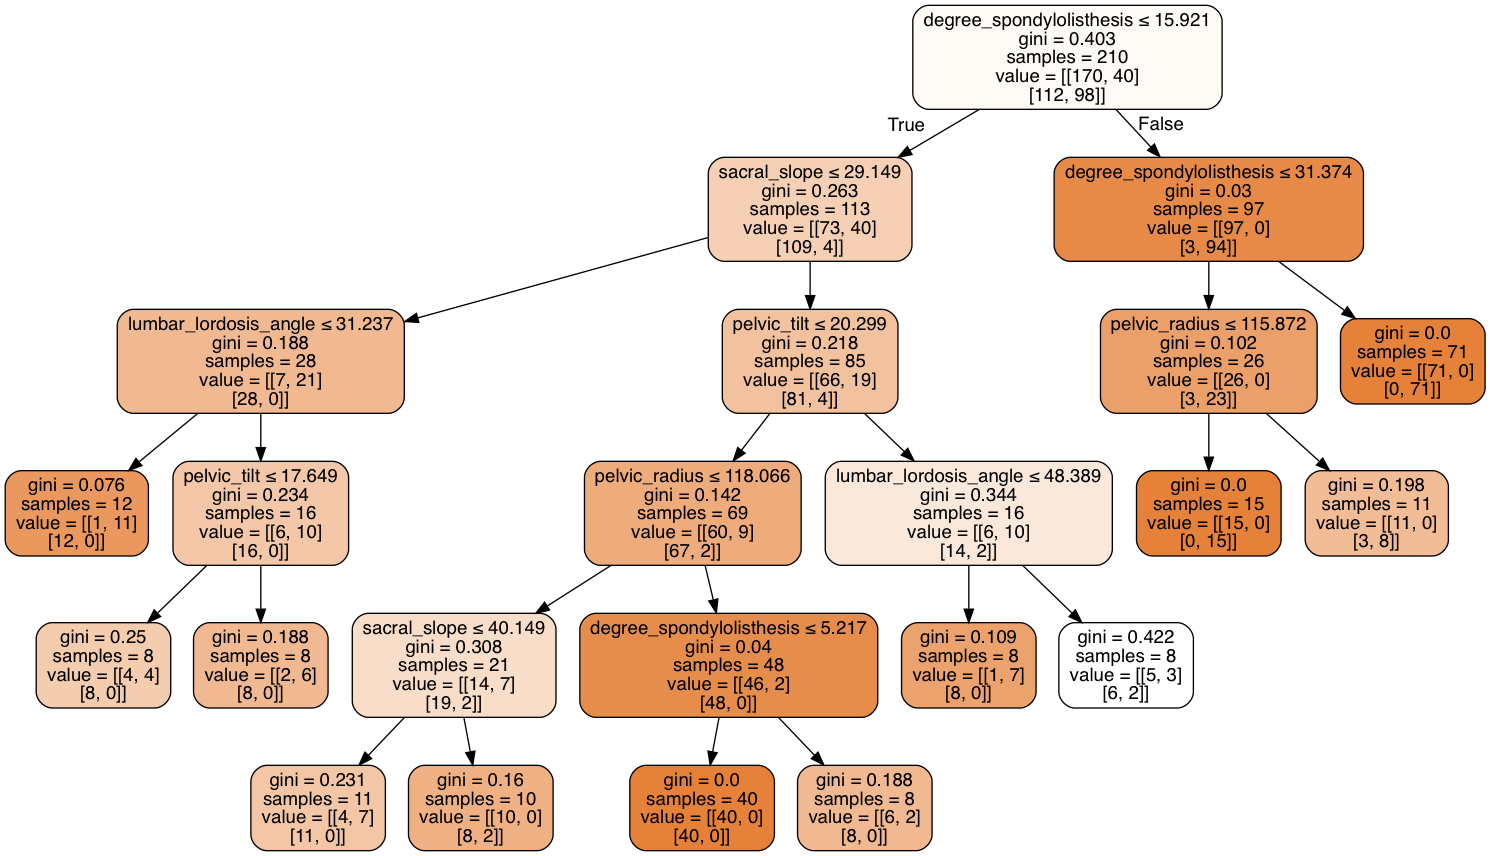

In [13]:
print("Minimum Records per leaf nodes: 8")
Image(graph[1].create_png())

Minimum Records per leaf nodes: 12


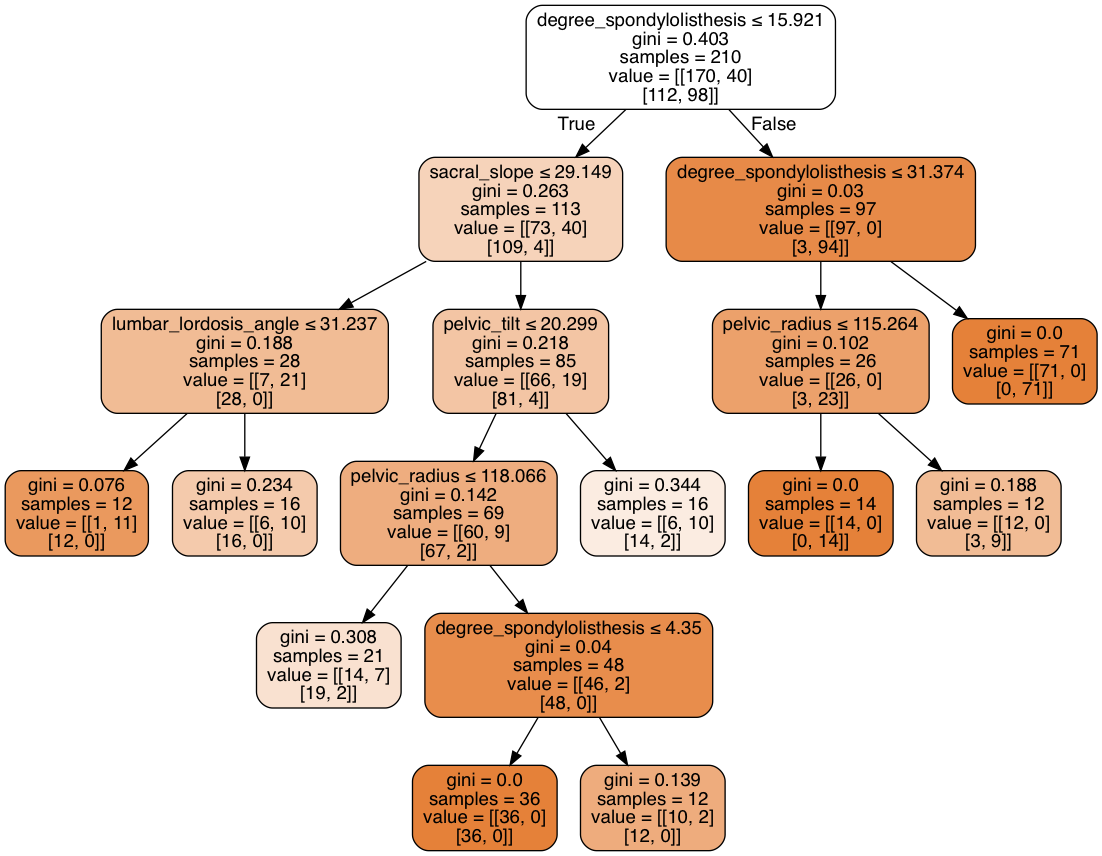

In [14]:
print("Minimum Records per leaf nodes: 12")
Image(graph[2].create_png())

Minimum Records per leaf nodes: 30


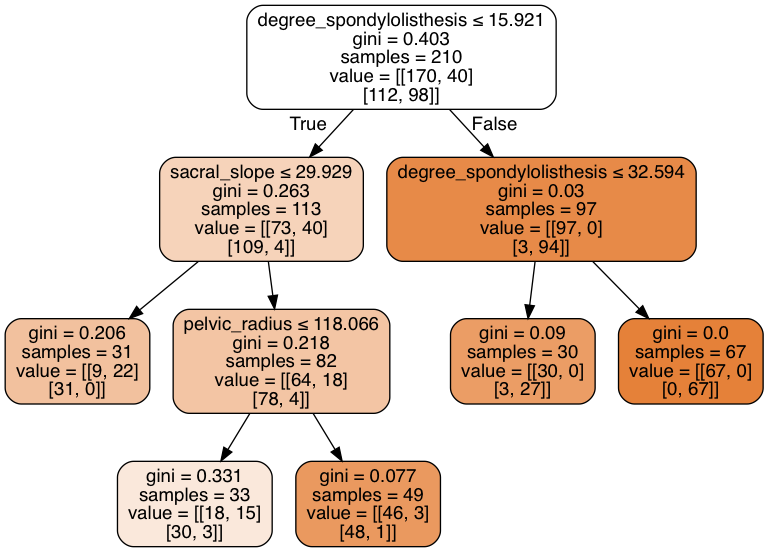

In [15]:
print("Minimum Records per leaf nodes: 30")
Image(graph[3].create_png())

Minimum Records per leaf nodes: 50


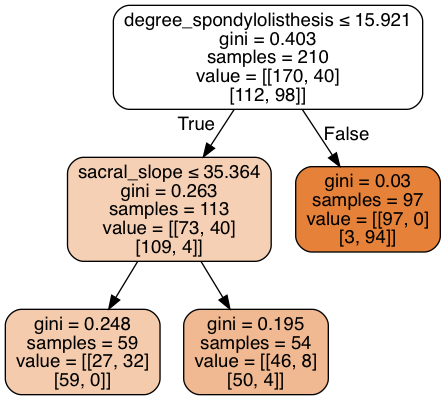

In [16]:
print("Minimum Records per leaf nodes: 50")
Image(graph[4].create_png())

In [17]:
Details2 = pd.DataFrame(np.column_stack([min_leaf, acc_list, pr_list, rc_list, graph]),
                       columns = ['Min_Records_Leaf','Accuracy_Score','Precision_Score','Recall_Score','Graph_Images'])
Details2

,Min_Records_Leaf,Accuracy_Score,Precision_Score,Recall_Score,Graph_Images
0,3,0.78,0.857143,0.833333,<pydotplus.graphviz.Dot object at 0x108f3f048>
1,8,0.87,0.927536,0.888889,<pydotplus.graphviz.Dot object at 0x1093b4198>
2,12,0.76,0.833333,0.833333,<pydotplus.graphviz.Dot object at 0x1093a5320>
3,30,0.82,0.921875,0.819444,<pydotplus.graphviz.Dot object at 0x108f00b00>
4,50,0.82,0.855263,0.902778,<pydotplus.graphviz.Dot object at 0x108ecd320>


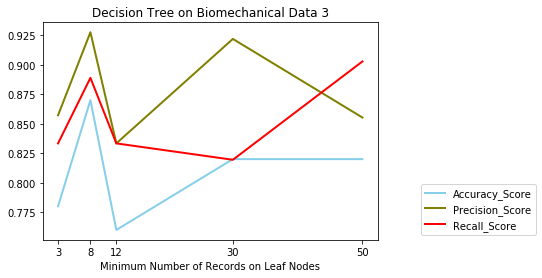

In [18]:
plt.plot(Details2['Min_Records_Leaf'], Details2['Accuracy_Score'], color='skyblue', linewidth = 2)
plt.plot(Details2['Min_Records_Leaf'], Details2['Precision_Score'], color='olive', linewidth = 2)
plt.plot(Details2['Min_Records_Leaf'], Details2['Recall_Score'], color='red', linewidth = 2)

plt.xlabel('Minimum Number of Records on Leaf Nodes')
plt.xticks(min_leaf)
plt.title('Decision Tree on Biomechanical Data 3')
plt.legend(loc='lower center', bbox_to_anchor=(0.8, 0., 1.0, 0.5))
plt.show()

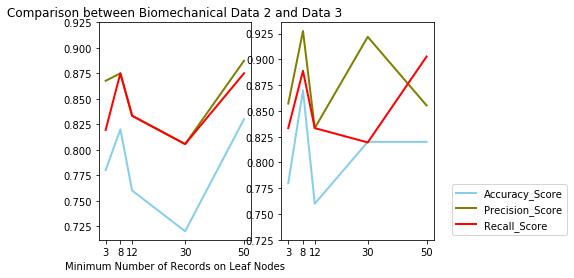

In [65]:
fig = plt.figure()
plt1 = fig.add_subplot(1,2,1)
plt.plot(Details1['Min_Records_Leaf'], Details1['Accuracy_Score'], color='skyblue', linewidth = 2)
plt.plot(Details1['Min_Records_Leaf'], Details1['Precision_Score'], color='olive', linewidth = 2)
plt.plot(Details1['Min_Records_Leaf'], Details1['Recall_Score'], color='red', linewidth = 2)
plt.xlabel('Minimum Number of Records on Leaf Nodes')
plt.xticks(min_leaf)
plt.yticks(np.arange(0.725,0.925,step=0.025))
plt.title('Comparison between Biomechanical Data 2 and Data 3')
plt2 = fig.add_subplot(1,2,2)
plt.plot(Details2['Min_Records_Leaf'], Details2['Accuracy_Score'], color='skyblue', linewidth = 2)
plt.plot(Details2['Min_Records_Leaf'], Details2['Precision_Score'], color='olive', linewidth = 2)
plt.plot(Details2['Min_Records_Leaf'], Details2['Recall_Score'], color='red', linewidth = 2)
plt.xticks(min_leaf)
plt.yticks(np.arange(0.725,0.925,step=0.025))
plt.legend(loc='lower center', bbox_to_anchor=(1, 0., 1.0, 0.5))
plt.show()

In [191]:
df = pd.read_csv(Data2)
dfi = pd.DataFrame(df)
bins = pd.DataFrame()
boundary = []
l = []

dfi['pelvic_incidence'], bins['pelvic_incidence'] = pd.cut(df['pelvic_incidence'],bins=4,labels=[0,1,2,3], retbins =  True)
dfi['pelvic_tilt numeric'], bins['pelvic_tilt numeric'] = pd.cut(df['pelvic_tilt numeric'],bins=4,labels=[0,1,2,3], retbins =  True)
dfi['lumbar_lordosis_angle'], bins['lumbar_lordosis_angle'] = pd.cut(df['lumbar_lordosis_angle'],bins=4,labels=[0,1,2,3], retbins =  True)
dfi['sacral_slope'], bins['sacral_slope'] = pd.cut(df['sacral_slope'],bins=4,labels=[0,1,2,3], retbins =  True)
dfi['pelvic_radius'], bins['pelvic_radius'] = pd.cut(df['pelvic_radius'],bins=4,labels=[0,1,2,3], retbins =  True)
dfi['degree_spondylolisthesis'], bins['degree_spondylolisthesis'] = pd.cut(df['degree_spondylolisthesis'],bins=4,labels=[0,1,2,3], retbins =  True)

for i in bins.columns.values:
    print(i)
    for j in bins.index.values:
        if j!=0:
            print('Interval ',j-1,' :',(bins[i][j-1],bins[i][j]))
    print('\n')

pelvic_incidence
Interval  0  : (26.044235290809997, 52.069451207500002)
Interval  1  : (52.069451207500002, 77.990981005000009)
Interval  2  : (77.990981005000009, 103.91251080250001)
Interval  3  : (103.91251080250001, 129.83404060000001)


pelvic_tilt numeric
Interval  0  : (-6.6109351589470009, 7.4417546397499992)
Interval  1  : (7.4417546397499992, 21.4384576265)
Interval  2  : (21.4384576265, 35.435160613249998)
Interval  3  : (35.435160613249998, 49.4318636)


lumbar_lordosis_angle
Interval  0  : (13.888257614500001, 41.935596375000003)
Interval  1  : (41.935596375000003, 69.871192750000006)
Interval  2  : (69.871192750000006, 97.806789124999995)
Interval  3  : (97.806789124999995, 125.7423855)


sacral_slope
Interval  0  : (13.2588680651, 40.382589424999999)
Interval  1  : (40.382589424999999, 67.398248150000001)
Interval  2  : (67.398248150000001, 94.413906874999995)
Interval  3  : (94.413906874999995, 121.42956559999999)


pelvic_radius
Interval  0  : (69.989586394359989, 93.

In [193]:
acc_list, pr_list, rc_list, dot_data = [],[],[],[]
min_leaf = [3,8,12,30,50]

X = dfi.drop('class',axis=1)
y = pd.get_dummies(dfi['class'].astype('category')).drop('Normal',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.32,random_state=42)
dot_data = StringIO()

for i in min_leaf:
    dtree = DecisionTreeClassifier(min_samples_leaf=i, random_state=42)
    dtree = dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)

    acc_list.append(dtree.score(X_test,y_test))
    pr_list.append(precision_score(y_test,y_pred))
    rc_list.append(recall_score(y_test,y_pred))

In [194]:
Details3 = pd.DataFrame(np.column_stack([min_leaf, acc_list, pr_list, rc_list]),
                       columns = ['Min_Records_Leaf','Accuracy_Score','Precision_Score','Recall_Score'])
Details3

,Min_Records_Leaf,Accuracy_Score,Precision_Score,Recall_Score
0,3.0,0.79,0.869565,0.833333
1,8.0,0.75,0.805195,0.861111
2,12.0,0.75,0.805195,0.861111
3,30.0,0.68,0.785714,0.763889
4,50.0,0.68,0.785714,0.763889


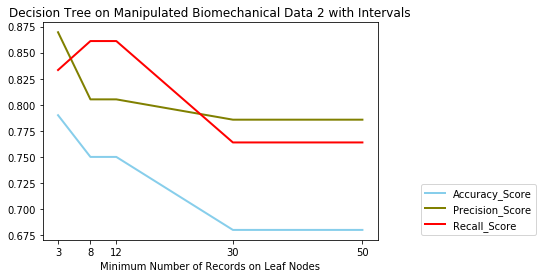

In [195]:
plt.plot(Details3['Min_Records_Leaf'], Details3['Accuracy_Score'], color='skyblue', linewidth = 2)
plt.plot(Details3['Min_Records_Leaf'], Details3['Precision_Score'], color='olive', linewidth = 2)
plt.plot(Details3['Min_Records_Leaf'], Details3['Recall_Score'], color='red', linewidth = 2)

plt.xlabel('Minimum Number of Records on Leaf Nodes')
plt.xticks(min_leaf)
plt.title('Decision Tree on Manipulated Biomechanical Data 2 with Intervals')
plt.legend(loc='lower center', bbox_to_anchor=(0.8, 0., 1.0, 0.5))
plt.show()

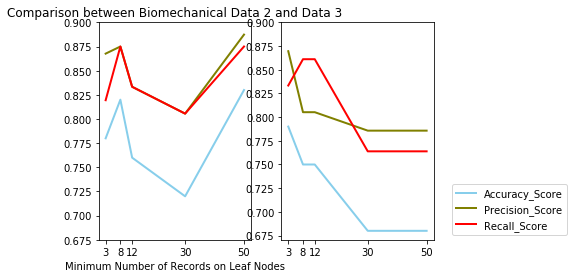

In [196]:
fig = plt.figure()
plt1 = fig.add_subplot(1,2,1)
plt.plot(Details1['Min_Records_Leaf'], Details1['Accuracy_Score'], color='skyblue', linewidth = 2)
plt.plot(Details1['Min_Records_Leaf'], Details1['Precision_Score'], color='olive', linewidth = 2)
plt.plot(Details1['Min_Records_Leaf'], Details1['Recall_Score'], color='red', linewidth = 2)
plt.xlabel('Minimum Number of Records on Leaf Nodes')
plt.xticks(min_leaf)
plt.yticks(np.arange(0.675,0.925,step=0.025))
plt.title('Comparison between Biomechanical Data 2 and Data 3')
plt2 = fig.add_subplot(1,2,2)
plt.plot(Details3['Min_Records_Leaf'], Details3['Accuracy_Score'], color='skyblue', linewidth = 2)
plt.plot(Details3['Min_Records_Leaf'], Details3['Precision_Score'], color='olive', linewidth = 2)
plt.plot(Details3['Min_Records_Leaf'], Details3['Recall_Score'], color='red', linewidth = 2)
plt.xticks(min_leaf)
plt.yticks(np.arange(0.675,0.925,step=0.025))
plt.legend(loc='lower center', bbox_to_anchor=(1, 0., 1.0, 0.5))
plt.show()